In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/Applied_ML/Practical' # Please adjust the path accordingly 
    os.chdir(path_to_file)
    !pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/Applied_ML/Practical


# Classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

from numpy import asarray
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = diabetes.drop(['Outcome'], axis =1)
y = diabetes.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) 

In [ ]:
#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [ ]:
X_train.shape

(537, 8)

In [ ]:
# Define the ANN model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape = (8,))) 
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset

history = model.fit(X_train, y_train, epochs=500, batch_size=50, validation_data = (X_test, y_test))

Epoch 1/500
11/11 [==============================] - 1s 25ms/step - loss: 0.7185 - accuracy: 0.4953 - val_loss: 0.6933 - val_accuracy: 0.5368
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 0.6616 - accuracy: 0.6201 - val_loss: 0.6452 - val_accuracy: 0.6710
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 0.6249 - accuracy: 0.6872 - val_loss: 0.6119 - val_accuracy: 0.6970
Epoch 4/500
11/11 [==============================] - 0s 4ms/step - loss: 0.5974 - accuracy: 0.7020 - val_loss: 0.5866 - val_accuracy: 0.7186
Epoch 5/500
11/11 [==============================] - 0s 5ms/step - loss: 0.5753 - accuracy: 0.7114 - val_loss: 0.5657 - val_accuracy: 0.7316
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 0.5568 - accuracy: 0.7263 - val_loss: 0.5476 - val_accuracy: 0.7489
Epoch 7/500
11/11 [==============================] - 0s 6ms/step - loss: 0.5406 - accuracy: 0.7393 - val_loss: 0.5326 - val_accuracy: 0.7489
Epoch 8/500


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

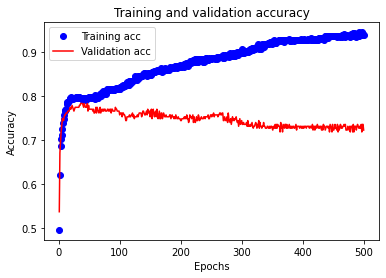

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
print('train acuracy: ', train_acc)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('test acuracy: ', test_acc)

train acuracy:  0.9459962844848633
test acuracy:  0.7229437232017517


# Exercise
Try to improve the model performance (e.g. test accuracy) by adjusting the model hyperparameters. E.g. the number of neurons, the number of epochs, batch size, optimizer learning rate and etc. 

# Regression

In [ ]:
# define the dataset
m = 500
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)


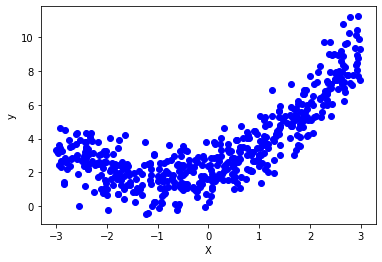

In [ ]:
plt.scatter(X, y, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10) 

In [ ]:
X_train.shape

(400, 1)

In [ ]:
# Define the ANN model
model = Sequential()
model.add(Dense(15, activation='relu', input_shape = (1,)))
model.add(Dense(15, activation='relu'))
model.add(Dense(1))

In [ ]:
# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
# fit the model on the dataset
history = model.fit(X_train, y_train, epochs=100, batch_size=30, validation_data = (X_test, y_test))

Epoch 1/100
14/14 [==============================] - 1s 16ms/step - loss: 21.0445 - mae: 3.8602 - val_loss: 17.7364 - val_mae: 3.5076
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 19.5183 - mae: 3.6401 - val_loss: 16.4066 - val_mae: 3.3054
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 18.2689 - mae: 3.4487 - val_loss: 15.3394 - val_mae: 3.1306
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 17.2142 - mae: 3.2816 - val_loss: 14.4234 - val_mae: 2.9753
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 16.3098 - mae: 3.1397 - val_loss: 13.6334 - val_mae: 2.8357
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 15.4653 - mae: 3.0119 - val_loss: 12.7927 - val_mae: 2.6900
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 14.4770 - mae: 2.8775 - val_loss: 11.8890 - val_mae: 2.5385
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - l

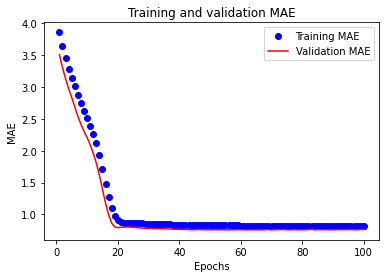

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

4/4 [==============================] - 0s 3ms/step


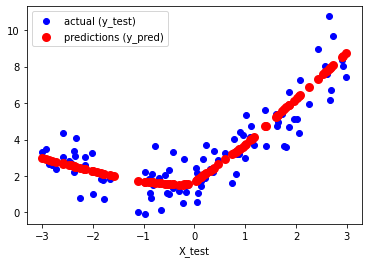

In [ ]:
#use the model to make prediction on test data
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue', label ='actual (y_test)')
plt.scatter(X_test, y_pred, color='red', label='predictions (y_pred)', linewidth=3)
plt.xlabel('X_test')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Value:', metrics.r2_score(y_test, y_pred))  

Mean Absolute Error: 0.7637615413845947
Mean Squared Error: 0.953603349880447
Root Mean Squared Error: 0.97652616446281
R Squared Value: 0.8083479574104735


# Exercise
Use the HDB dataset and build an ANN model to predict resale price

In [ ]:
dataset = pd.read_csv("resale-sample.csv")
dataset

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-09,CHOA CHU KANG,4 ROOM,119,TECK WHYE LANE,04 TO 06,104.0,Model A,1989,400000.0
1,2012-06,BUKIT MERAH,3 ROOM,22,HAVELOCK RD,04 TO 06,64.0,Standard,1969,404000.0
2,2016-05,JURONG WEST,EXECUTIVE,906,JURONG WEST ST 91,07 TO 09,141.0,Apartment,1989,422000.0
3,2013-10,JURONG WEST,3 ROOM,510,JURONG WEST ST 52,13 TO 15,74.0,Model A,1984,375000.0
4,2015-04,JURONG EAST,4 ROOM,232,JURONG EAST ST 21,07 TO 09,95.0,New Generation,1982,385000.0
...,...,...,...,...,...,...,...,...,...,...
1995,2012-06,TOA PAYOH,3 ROOM,20,LOR 7 TOA PAYOH,07 TO 09,67.0,Improved,1970,353000.0
1996,2012-06,YISHUN,4 ROOM,156,YISHUN ST 11,01 TO 03,93.0,New Generation,1985,400000.0
1997,2015-08,TAMPINES,4 ROOM,155,SIMEI RD,01 TO 03,104.0,Model A,1989,428000.0
1998,2017-02,JURONG WEST,4 ROOM,645,JURONG WEST ST 61,07 TO 09,100.0,Model A,1998,416000.0


In [ ]:
mapping = {'2 ROOM':0, '3 ROOM':1, '4 ROOM':2, '5 ROOM':3,'EXECUTIVE':4,'MULTI-GENERATION':5}

In [ ]:
dataset['flat_type_num'] = dataset['flat_type'].map(mapping)
dataset

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,flat_type_num
0,2012-09,CHOA CHU KANG,4 ROOM,119,TECK WHYE LANE,04 TO 06,104.0,Model A,1989,400000.0,2
1,2012-06,BUKIT MERAH,3 ROOM,22,HAVELOCK RD,04 TO 06,64.0,Standard,1969,404000.0,1
2,2016-05,JURONG WEST,EXECUTIVE,906,JURONG WEST ST 91,07 TO 09,141.0,Apartment,1989,422000.0,4
3,2013-10,JURONG WEST,3 ROOM,510,JURONG WEST ST 52,13 TO 15,74.0,Model A,1984,375000.0,1
4,2015-04,JURONG EAST,4 ROOM,232,JURONG EAST ST 21,07 TO 09,95.0,New Generation,1982,385000.0,2
...,...,...,...,...,...,...,...,...,...,...,...
1995,2012-06,TOA PAYOH,3 ROOM,20,LOR 7 TOA PAYOH,07 TO 09,67.0,Improved,1970,353000.0,1
1996,2012-06,YISHUN,4 ROOM,156,YISHUN ST 11,01 TO 03,93.0,New Generation,1985,400000.0,2
1997,2015-08,TAMPINES,4 ROOM,155,SIMEI RD,01 TO 03,104.0,Model A,1989,428000.0,2
1998,2017-02,JURONG WEST,4 ROOM,645,JURONG WEST ST 61,07 TO 09,100.0,Model A,1998,416000.0,2


In [ ]:
X = dataset[['floor_area_sqm', 'flat_type_num', 'lease_commence_date']]
y = dataset['resale_price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std